In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("/content/placement.csv" )
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: ylabel='Density'>

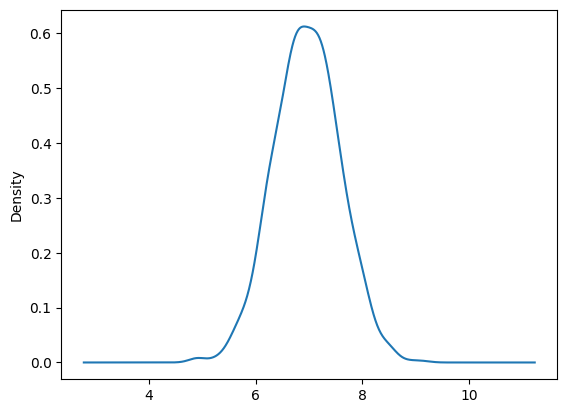

In [38]:
df["cgpa"].plot(kind = "kde")

<ipython-input-39-e2b4c2324d7c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["placement_exam_marks"])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

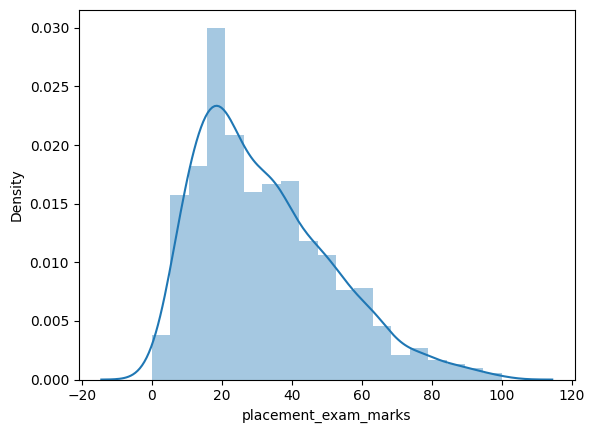

In [39]:
sns.distplot(df["placement_exam_marks"])

In [40]:
df["placement_exam_marks"].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


In [43]:
df["placement_exam_marks"].quantile(99/100)

87.0

In [44]:
df["placement_exam_marks"].quantile(1/100)

4.0

In [45]:
upper_limit = df["placement_exam_marks"].quantile(99/100)
lower_limit = df["placement_exam_marks"].quantile(1/100)
print("Upper Limit: ", upper_limit)
print("Lower Limit: ", lower_limit)

Upper Limit:  87.0
Lower Limit:  4.0


# **Trimming **

In [46]:
df[df["placement_exam_marks"] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
134,6.33,93.0,0
162,7.80,90.0,0
324,6.64,90.0,0
630,6.56,96.0,1
730,6.14,90.0,1
846,6.99,97.0,0
917,5.95,100.0,0


In [47]:
df[df["placement_exam_marks"] < lower_limit]

,cgpa,placement_exam_marks,placed
74,6.16,3.0,1
117,7.11,0.0,1
219,5.48,3.0,0
701,6.74,2.0,1
863,8.04,2.0,1
943,7.36,2.0,0


In [48]:
df["placement_exam_marks"].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


In [49]:
trimmed_df = df[(df["placement_exam_marks"] <= upper_limit) & (df["placement_exam_marks"] >= lower_limit)]
trimmed_df["placement_exam_marks"].describe()

,placement_exam_marks
count,986.000000
mean,31.909736
std,18.294183
min,4.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,87.000000


<Axes: ylabel='placement_exam_marks'>

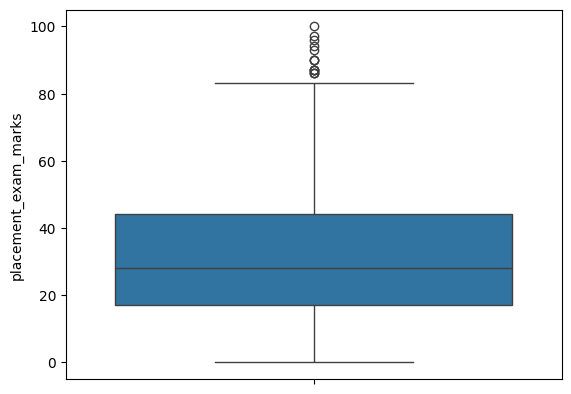

In [50]:
sns.boxplot(df["placement_exam_marks"])

<Axes: ylabel='placement_exam_marks'>

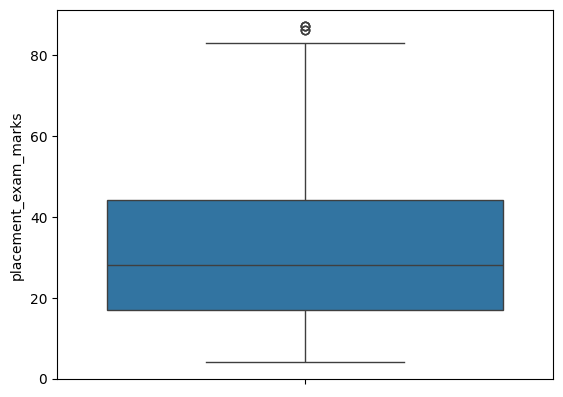

In [51]:
sns.boxplot(trimmed_df["placement_exam_marks"])

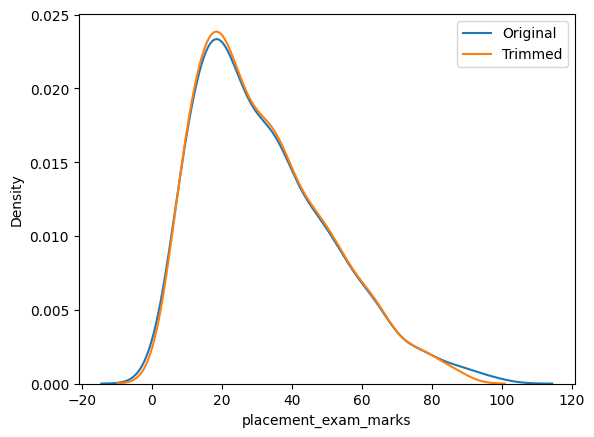

In [52]:
sns.kdeplot(df["placement_exam_marks"] , label = "Original")
sns.kdeplot(trimmed_df["placement_exam_marks"] , label = "Trimmed")
plt.legend()

# **Capping OR Winsorization**

In [53]:
capped_df = df.copy()
capped_df["placement_exam_marks"] = np.where(df["placement_exam_marks"] > upper_limit , upper_limit,
                                             np.where(df["placement_exam_marks"] < lower_limit , lower_limit,
                                                      df["placement_exam_marks"]))

In [54]:
capped_df["placement_exam_marks"].describe()

,placement_exam_marks
count,1000.000000
mean,32.183000
std,18.944509
min,4.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,87.000000


<Axes: ylabel='placement_exam_marks'>

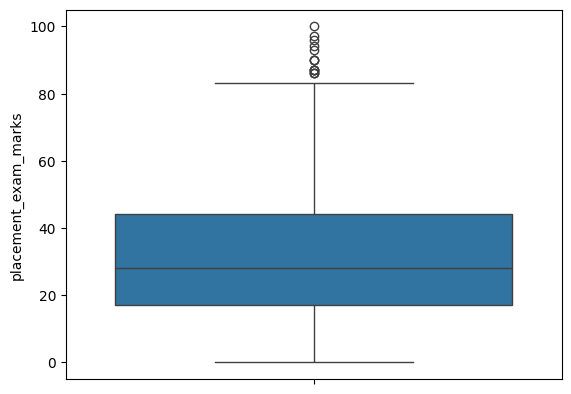

In [55]:
sns.boxplot(df["placement_exam_marks"])

<Axes: ylabel='placement_exam_marks'>

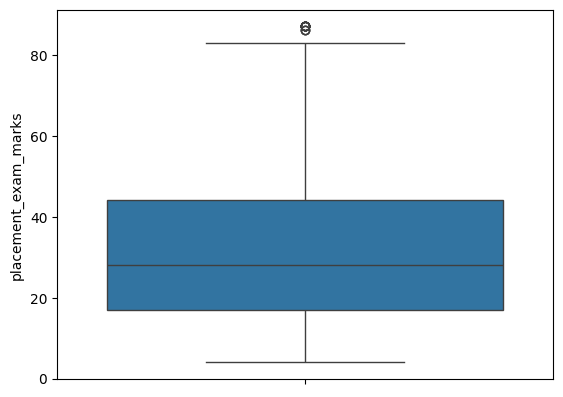

In [56]:
sns.boxplot(capped_df["placement_exam_marks"])

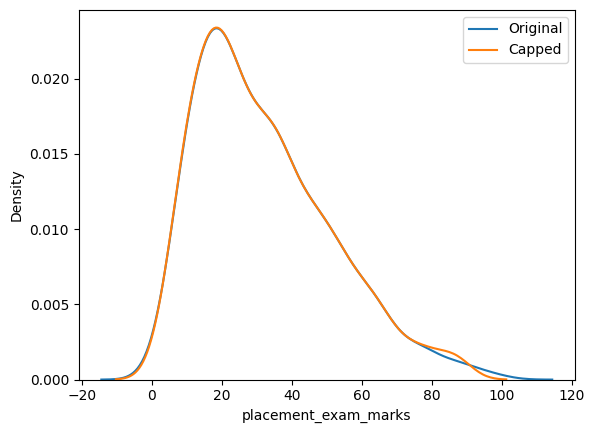

In [57]:
sns.kdeplot(df["placement_exam_marks"] , label = "Original")
sns.kdeplot(capped_df["placement_exam_marks"] , label = "Capped")
plt.legend()